In [38]:
# If you want to run this on Google Colab, just uncomment the following lines. Please note,
# that you will need to locate your folder directly in the root directory of your Google Drive (/content/drive/My Drive/).
# Because otherwise, it won't work out of the box and you would need to adjust the path in here.
#
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#
#import os
#os.chdir("/content/drive/My Drive/CSMP-Project")

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from keras import layers

2023-03-15 11:02:21.816246: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 11:02:22.043520: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-15 11:02:22.043555: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-15 11:02:22.989564: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
data_file = '../../../data/unNormMar1st.csv'

dataset = pd.read_csv(data_file, sep=';')

dataset

,Size,lamdabR,lambdaS,gamma,rho,normPulloff
0,512,128,32,0.455834,4.18537,0.009895
1,1536,128,64,0.435573,1.67609,0.000039
2,1536,512,16,0.005227,3.18212,0.000133
3,1280,64,32,0.177285,3.76808,0.022324
4,2048,256,16,0.076352,2.98880,0.000205
...,...,...,...,...,...,...
244,768,768,96,0.727092,4.59056,0.001356
245,2048,512,8,0.483503,1.77412,0.000047
246,2048,128,8,0.357011,2.82643,0.019321
247,768,192,4,0.017707,3.95707,0.010177


In [3]:
test_data_file = '../../../data/unNormData4test.csv'

true_test_dataset = pd.read_csv(test_data_file, sep='\t')

true_test_dataset

,Size,lamdabR,lambdaS,gamma,rho,normPulloff
0,512,128,1,0.147602,0.800000,0.002108
1,1024,512,1,0.286779,1.284670,0.001330
2,512,128,1,0.320875,1.338400,0.030261
3,512,128,2,0.060566,0.137601,0.000008
4,512,128,1,0.802188,0.616336,0.037609
5,512,128,1,0.269535,0.297881,0.000936
6,512,128,4,1.178140,1.220850,0.030085
7,1792,896,224,0.068421,4.906940,0.000391
8,256,128,32,0.929622,2.197850,0.010346
9,2048,512,256,0.284066,1.309780,0.000060


In [4]:
def test_results(model, true_vals, name: str):
    preds = model.predict(true_vals.drop(['normPulloff'], axis=1))
    df = pd.DataFrame(data={'#true_vals': true_vals['normPulloff'], '#preds': preds})
    df.to_csv(path_or_buf='../../../results/unnorm/' + name + '.csv', sep='\t', index=False)

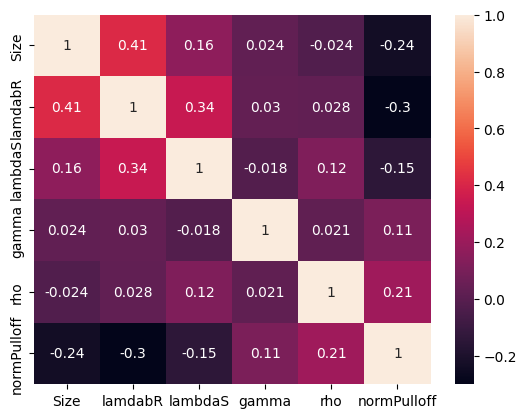

In [5]:
dataplot = sns.heatmap(dataset.corr(), cmap="rocket", annot=True)

plt.show()

In [6]:
dataset.describe()

,Size,lamdabR,lambdaS,gamma,rho,normPulloff
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1255.325301,509.172691,95.052209,0.465411,2.633756,0.018394
std,532.167141,538.768225,197.670142,0.295416,1.309125,0.050093
min,256.000000,32.000000,4.000000,0.005227,0.125262,0.000003
25%,768.000000,128.000000,8.000000,0.201106,1.637750,0.000210
50%,1280.000000,256.000000,32.000000,0.446783,2.613690,0.000628
75%,1792.000000,768.000000,112.000000,0.716534,3.703470,0.002929
max,2048.000000,2048.000000,2048.000000,0.991867,4.993650,0.357983


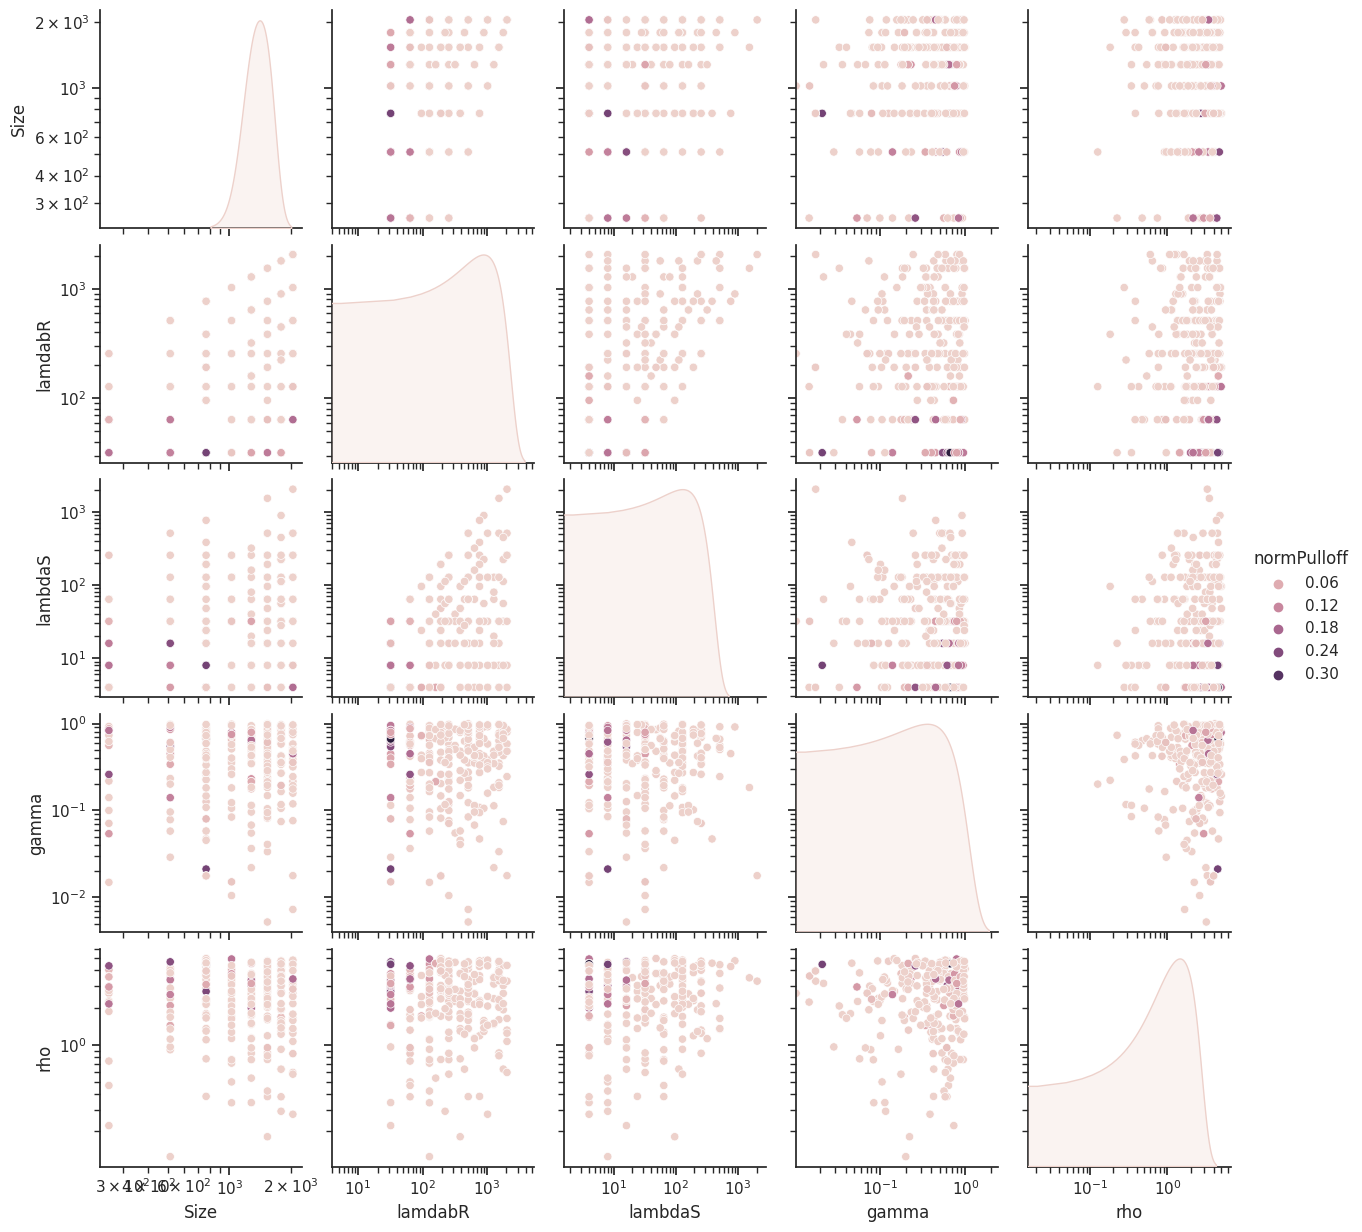

In [7]:
sns.set_theme(style="ticks")
pl = sns.pairplot(dataset, hue='normPulloff')

for ax in pl.axes.flat:
    ax.set(xscale='log')
    ax.set(yscale='log')

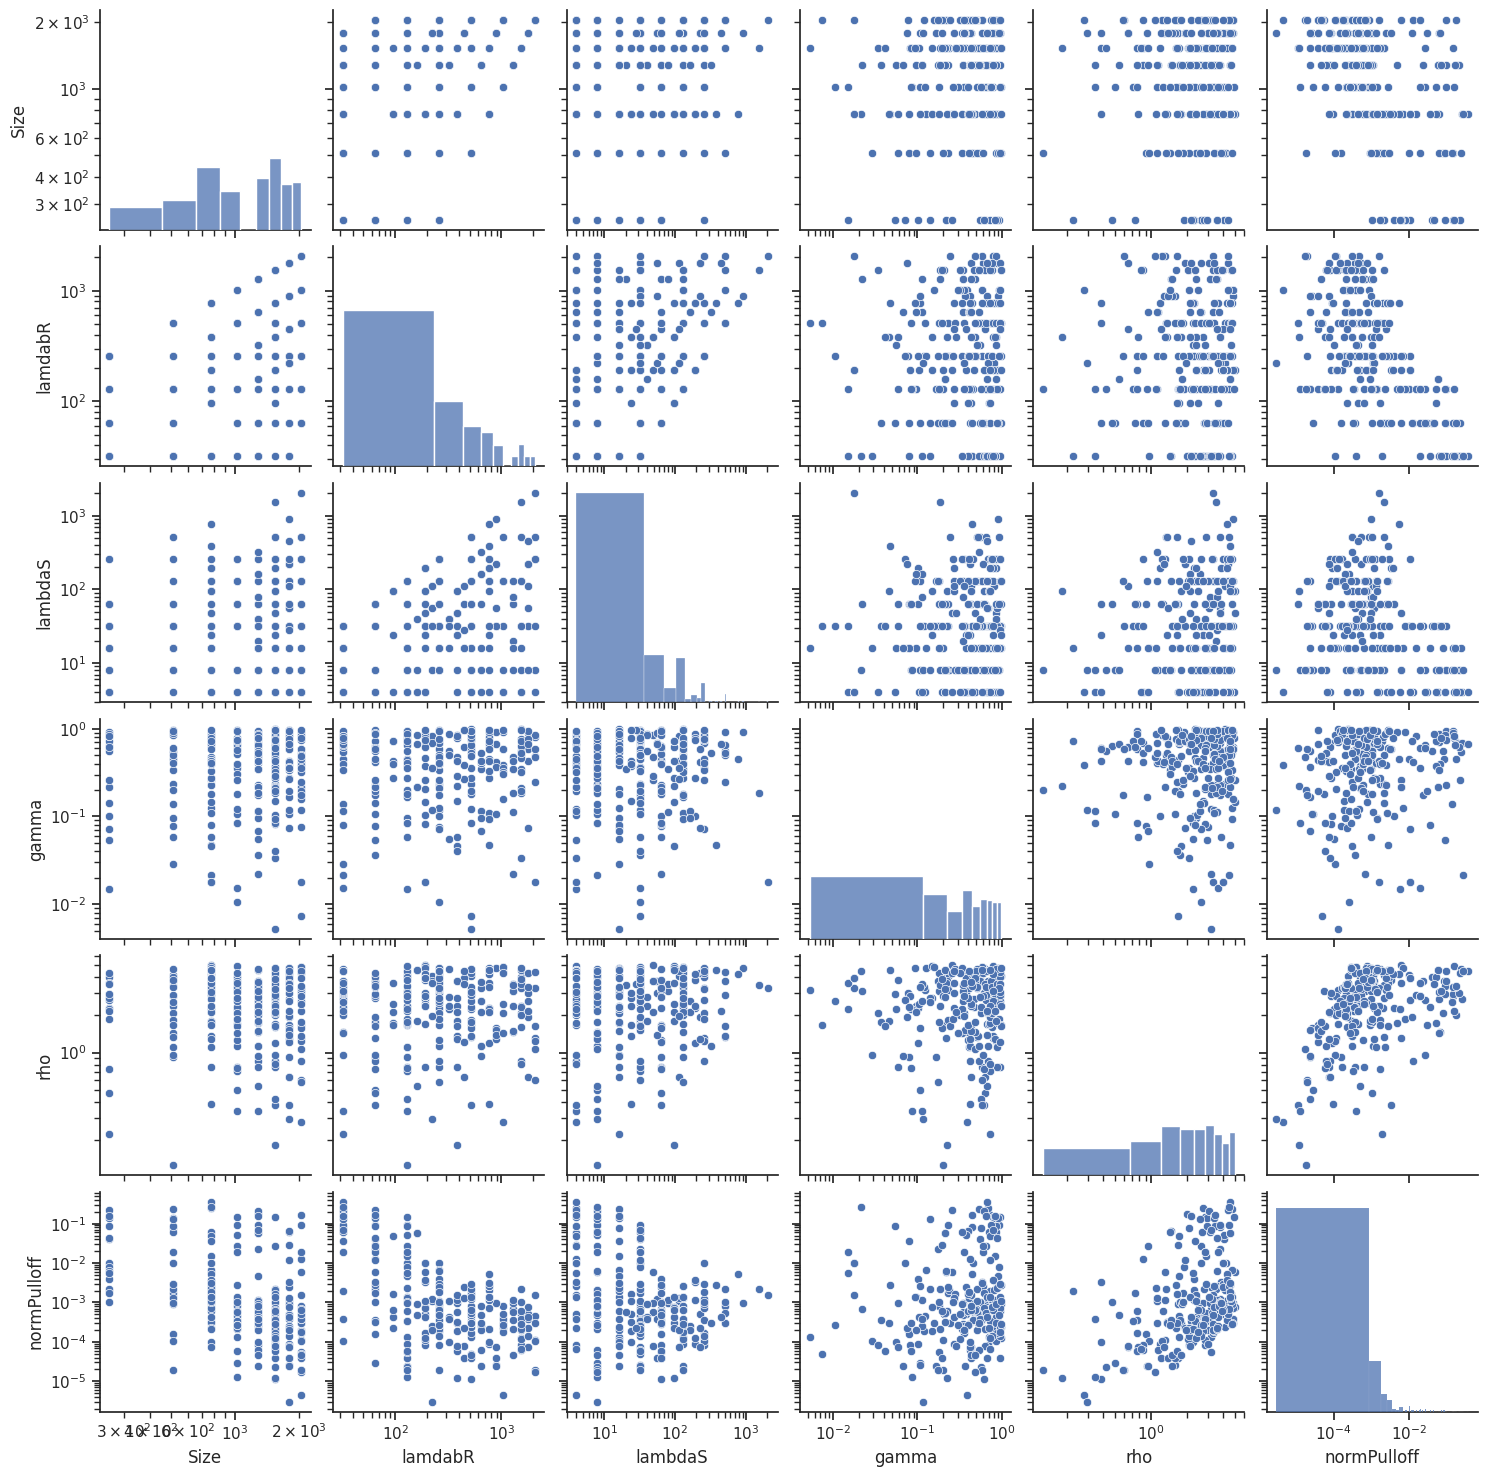

In [8]:
sns.set_theme(style="ticks")
pl = sns.pairplot(dataset)

for ax in pl.axes.flat:
    ax.set(xscale='log')
    ax.set(yscale='log')

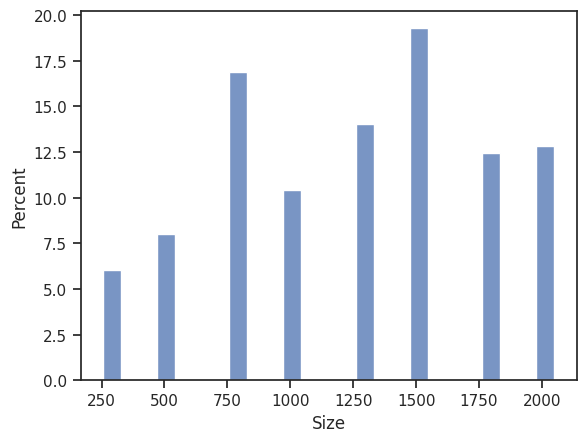

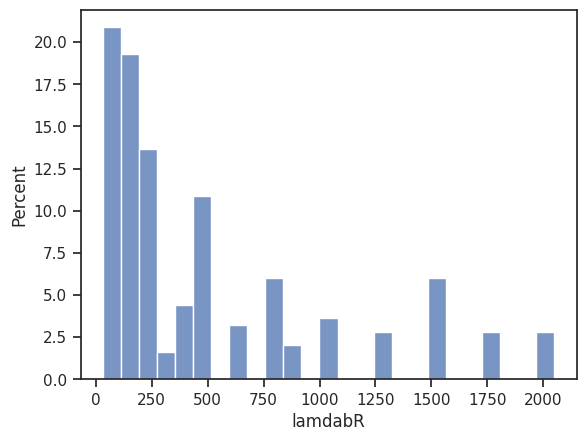

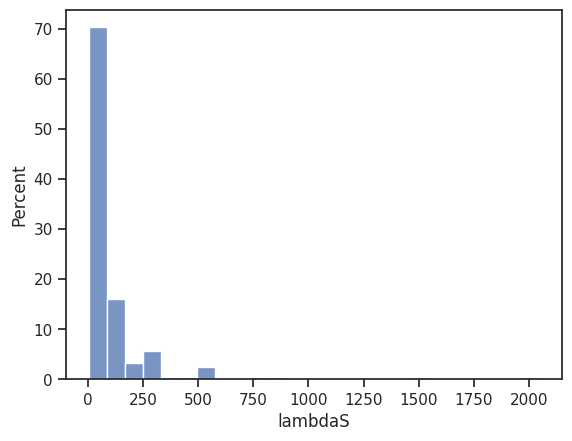

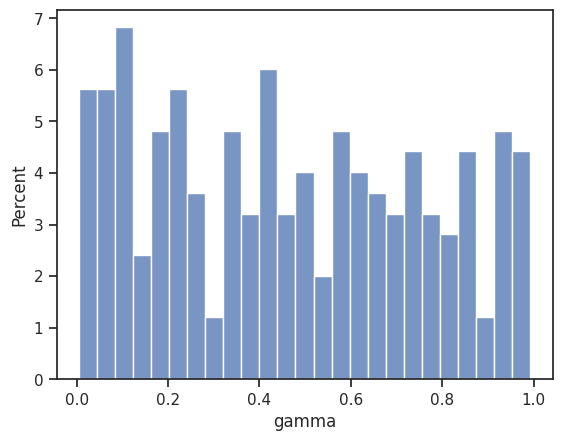

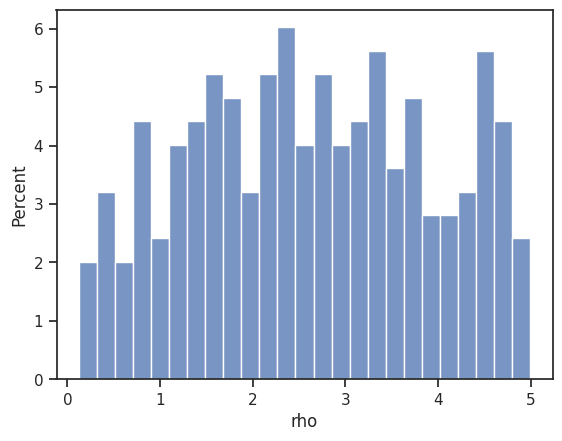

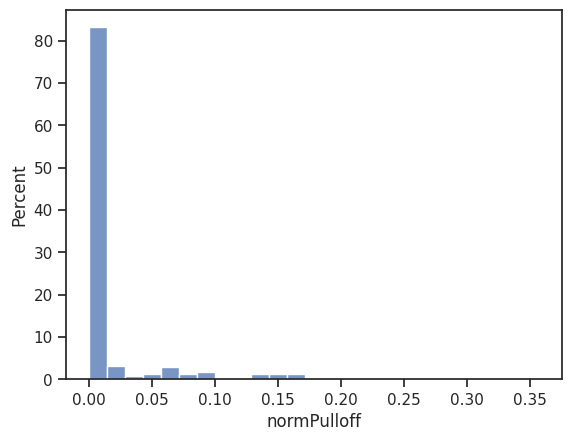

In [9]:
for col in dataset.columns:
    sns.histplot(data=dataset, x=col, stat='percent', bins=25)
    plt.show()

In [10]:
num_samples = len(dataset) - 20

train_dataset = dataset.take(range(0,num_samples))
test_dataset = dataset.drop(train_dataset.index)

test_dataset.sort_values('gamma', inplace=True)

len(train_dataset)

229

In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = list(train_features.pop('normPulloff'))
test_labels = list(test_features.pop('normPulloff'))

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState()

ada_regr = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=12), n_estimators=300, learning_rate=.2 , loss='linear', random_state=rng
)

ada_regr.fit(train_dataset.drop(['normPulloff'], axis=1), train_labels)

preds = ada_regr.predict(test_dataset.drop(['normPulloff'], axis=1))

# The mean squared error
mse = mean_squared_error(test_dataset['normPulloff'], preds)
print("Mean squared error: %.10f" % mse)
# The RSME
print("Root Mean squared error: %.10f" % np.sqrt(mse))
# The mean absolute error
print("Mean absolute error: %.10f" % mean_absolute_error(test_dataset['normPulloff'], preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(test_dataset['normPulloff'], preds))

Mean squared error: 0.0001202191
Root Mean squared error: 0.0109644463
Mean absolute error: 0.0049461771
Coefficient of determination: 0.90630


In [28]:
test_results(ada_regr, true_test_dataset, 'AdaBoostRegressor')

[]

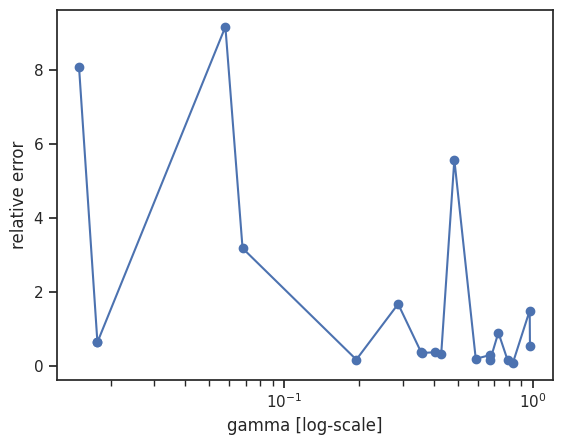

In [29]:
chi = list()

for i in range(len(test_labels)):
    curr = abs(test_labels[i] - preds[i]) / test_labels[i]
    chi.append(curr)

plt.plot(test_dataset['gamma'], chi, marker='o', label='Chi Square')
plt.xscale('log')
plt.xlabel('gamma [log-scale]')
plt.ylabel('relative error')
plt.plot()

[]

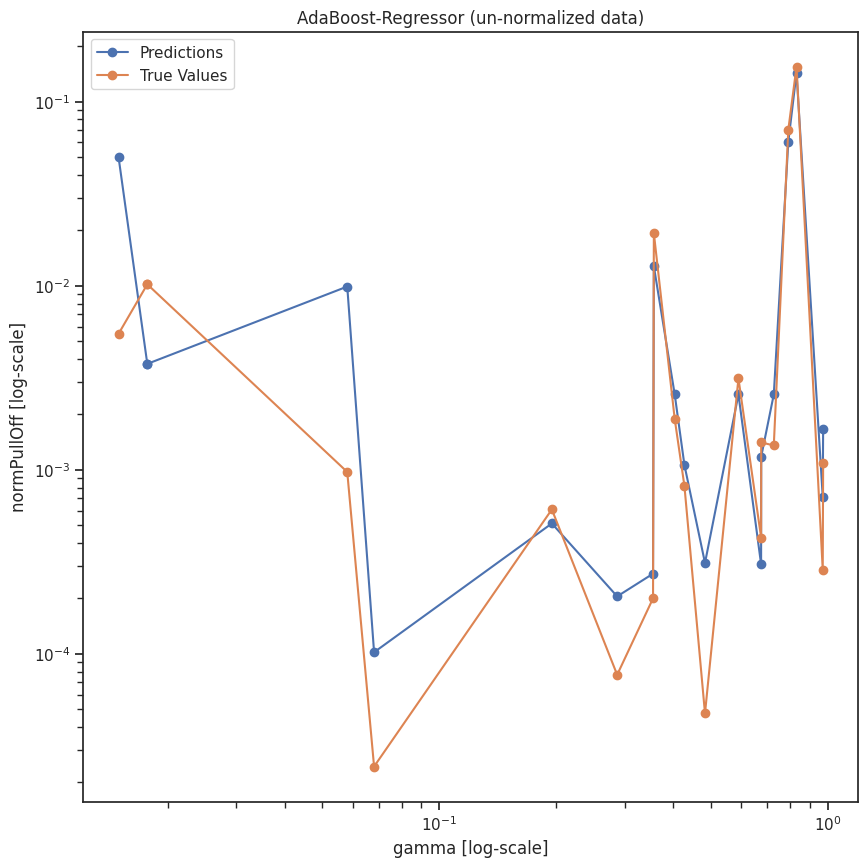

In [30]:
plt.figure(figsize=(10,10))
a = plt.axes()
plt.plot(test_features["gamma"], preds, ls='-', marker='o', label='Predictions')
plt.plot(test_features["gamma"], test_labels, ls='-', marker='o', label='True Values')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title("AdaBoost-Regressor (un-normalized data)")
plt.xlabel('gamma [log-scale]')
plt.ylabel('normPullOff [log-scale]')
plt.plot()

In [31]:
from sklearn.ensemble import RandomForestRegressor

randForestReg = RandomForestRegressor(n_estimators=500, criterion="absolute_error")
randForestReg.fit(train_dataset.drop(['normPulloff'], axis=1), train_labels)

preds = randForestReg.predict(test_dataset.drop(['normPulloff'], axis=1))

# The mean squared error
mse = mean_squared_error(test_dataset['normPulloff'], preds)
print("Mean squared error: %.10f" % mse)
# The RSME
print("Root Mean squared error: %.10f" % np.sqrt(mse))
# The mean absolute error
print("Mean absolute error: %.10f" % mean_absolute_error(test_dataset['normPulloff'], preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(test_dataset['normPulloff'], preds))

Mean squared error: 0.0001923669
Root Mean squared error: 0.0138696410
Mean absolute error: 0.0079366419
Coefficient of determination: 0.85007


In [32]:
test_results(randForestReg, true_test_dataset, 'RandomForestRegressor')

[]

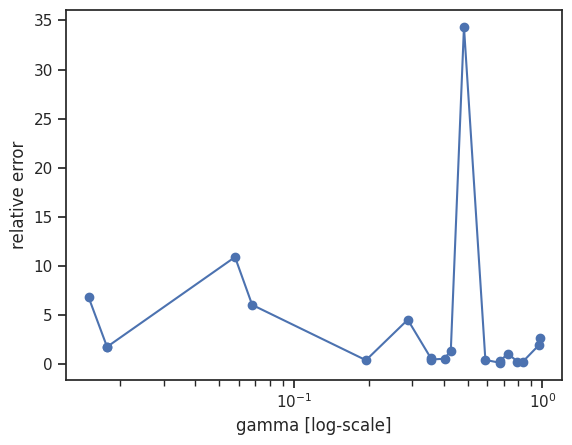

In [33]:
chi = list()

for i in range(len(test_labels)):
    curr = abs(test_labels[i] - preds[i]) / test_labels[i]
    chi.append(curr)

plt.plot(test_dataset['gamma'], chi, marker='o', label='Chi Square')
plt.xscale('log')
plt.xlabel('gamma [log-scale]')
plt.ylabel('relative error')
plt.plot()

[]

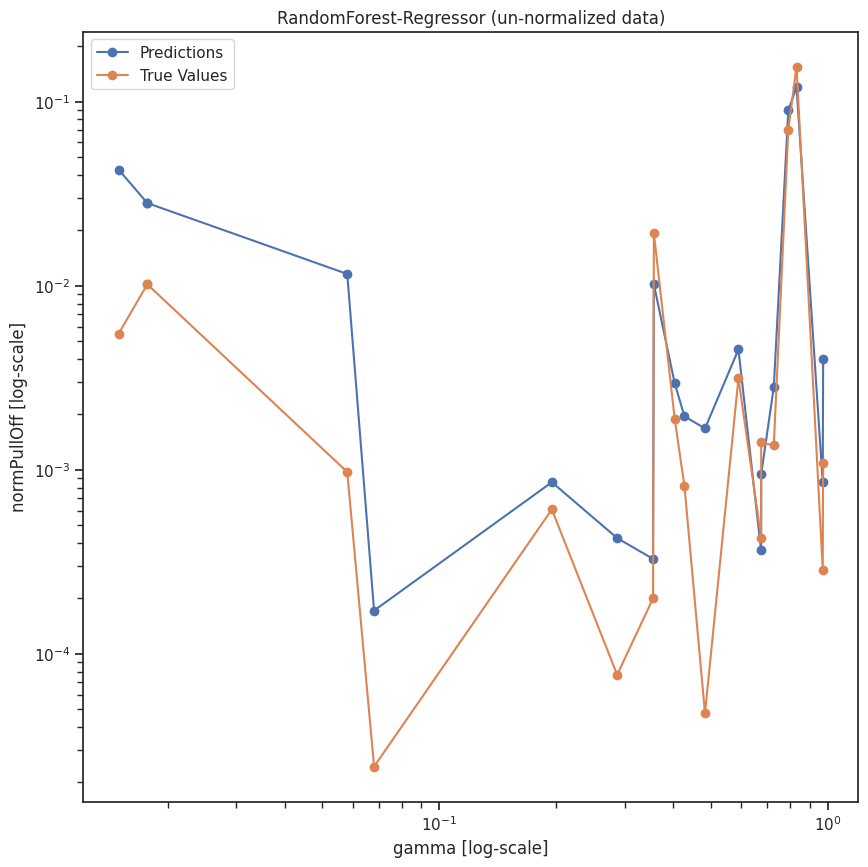

In [34]:
plt.figure(figsize=(10,10))
a = plt.axes()
plt.plot(test_features["gamma"], preds, marker='o', label='Predictions')
plt.plot(test_features["gamma"], test_labels, marker='o', label='True Values')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title("RandomForest-Regressor (un-normalized data)")
plt.xlabel('gamma [log-scale]')
plt.ylabel('normPullOff [log-scale]')
plt.plot()

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

grb = GradientBoostingRegressor(
    loss='huber',
    learning_rate=0.1,
    subsample=.9,
    n_estimators=500,
    max_depth=3,
    criterion='friedman_mse',
    alpha=0.8,
    warm_start=True,
)

grb.fit(train_dataset.drop(['normPulloff'], axis=1), train_labels)

preds = grb.predict(test_dataset.drop(['normPulloff'], axis=1))

# The mean squared error
mse = mean_squared_error(test_dataset['normPulloff'], preds)
print("Mean squared error: %.10f" % mse)
# The RSME
print("Root Mean squared error: %.10f" % np.sqrt(mse))
# The mean absolute error
print("Mean absolute error: %.10f" % mean_absolute_error(test_dataset['normPulloff'], preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(test_dataset['normPulloff'], preds))

Mean squared error: 0.0000923768
Root Mean squared error: 0.0096112851
Mean absolute error: 0.0061655166
Coefficient of determination: 0.92800


In [36]:
test_results(grb, true_test_dataset, 'GradientBoostingRegressor')

[]

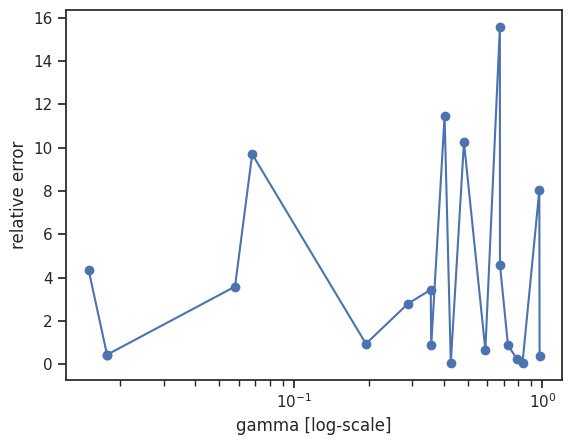

In [37]:
chi = list()

for i in range(len(test_labels)):
    curr = abs(test_labels[i] - preds[i]) / test_labels[i]
    chi.append(curr)

plt.plot(test_dataset['gamma'], chi, marker='o', label='Chi Square')
plt.xscale('log')
plt.xlabel('gamma [log-scale]')
plt.ylabel('relative error')
plt.plot()

[]

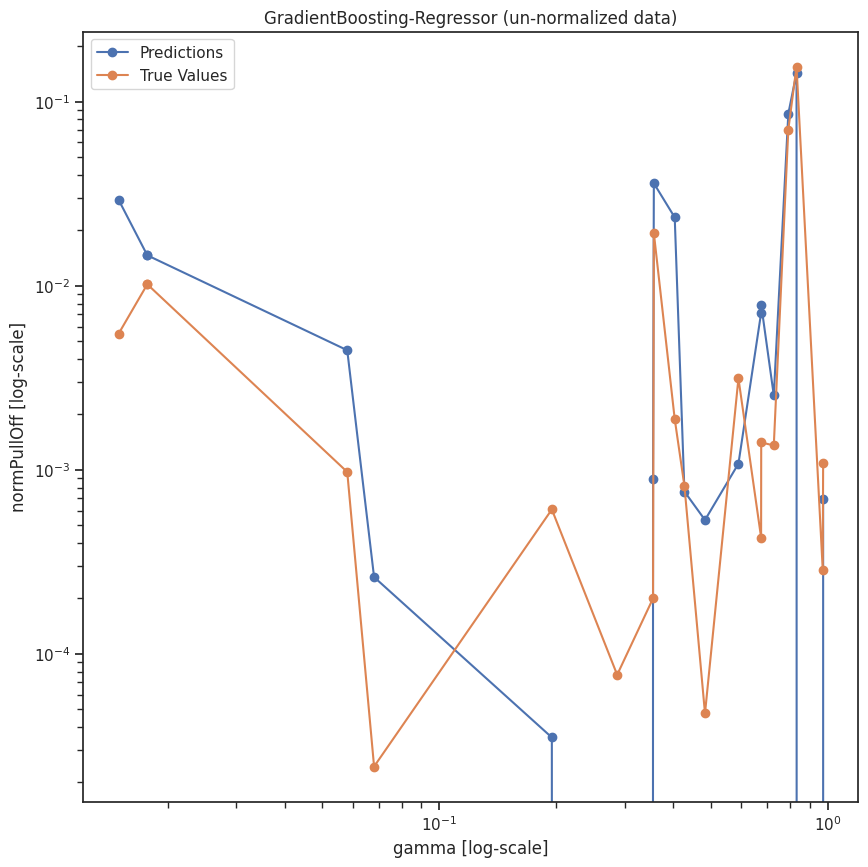

In [38]:
plt.figure(figsize=(10,10))
a = plt.axes()
plt.plot(test_features["gamma"], preds, marker='o', label='Predictions')
plt.plot(test_features["gamma"], test_labels, marker='o', label='True Values')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title("GradientBoosting-Regressor (un-normalized data)")
plt.xlabel('gamma [log-scale]')
plt.ylabel('normPullOff [log-scale]')
plt.plot()

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=7, weights='distance', p=2)
knn_reg.fit(train_dataset.drop(['normPulloff'], axis=1), train_labels)

preds = knn_reg.predict(test_dataset.drop(['normPulloff'], axis=1))

# The mean squared error
mse = mean_squared_error(test_dataset['normPulloff'], preds)
print("Mean squared error: %.10f" % mse)
# The RSME
print("Root Mean squared error: %.10f" % np.sqrt(mse))
# The mean absolute error
print("Mean absolute error: %.10f" % mean_absolute_error(test_dataset['normPulloff'], preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(test_dataset['normPulloff'], preds))

Mean squared error: 0.0007100026
Root Mean squared error: 0.0266458748
Mean absolute error: 0.0130997157
Coefficient of determination: 0.44663


In [40]:
test_results(knn_reg, true_test_dataset, 'KNN-Regressor')

[]

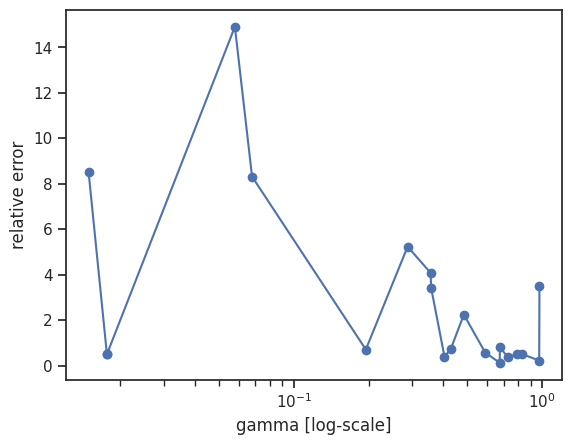

In [41]:
chi = list()

for i in range(len(test_labels)):
    curr = abs(test_labels[i] - preds[i]) / test_labels[i]
    chi.append(curr)

plt.plot(test_dataset['gamma'], chi, marker='o', label='Chi Square')
plt.xscale('log')
plt.xlabel('gamma [log-scale]')
plt.ylabel('relative error')
plt.plot()

[]

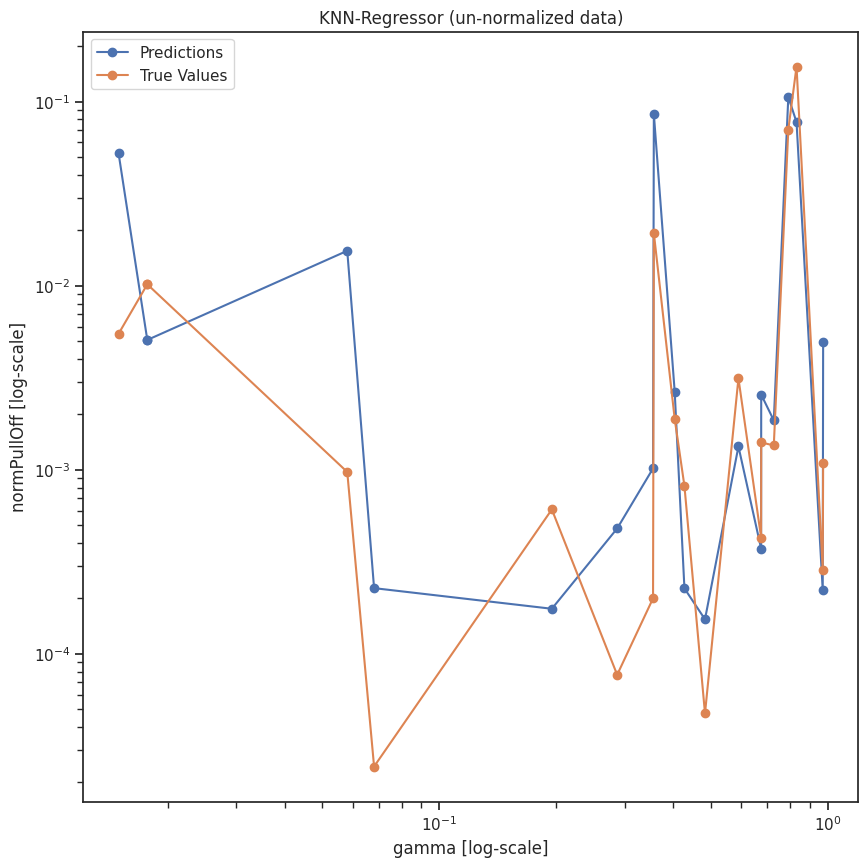

In [42]:
plt.figure(figsize=(10,10))
a = plt.axes()
plt.plot(test_features["gamma"], preds, marker='o', label='Predictions')
plt.plot(test_features["gamma"], test_labels, marker='o', label='True Values')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title("KNN-Regressor (un-normalized data)")
plt.xlabel('gamma [log-scale]')
plt.ylabel('normPullOff [log-scale]')
plt.plot()

In [44]:
from sklearn.ensemble import VotingRegressor

rng = np.random.RandomState()

randForestReg = RandomForestRegressor(n_estimators=500, criterion="squared_error")
knn_reg = KNeighborsRegressor(n_neighbors=7, weights='distance', p=2)
grb = GradientBoostingRegressor(
    loss='huber',
    learning_rate=0.1,
    subsample=.9,
    n_estimators=500,
    max_depth=3,
    criterion='friedman_mse',
    alpha=0.8,
    warm_start=True,
)
ada_regr = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=12), n_estimators=300, learning_rate=.2, loss='square', random_state=rng
)

ereg = VotingRegressor(estimators=[('ada', ada_regr), ('grb', grb), ('knn', knn_reg), ('RF', randForestReg)])
ereg = ereg.fit(train_dataset.drop(['normPulloff'], axis=1), train_labels)

preds = ereg.predict(test_dataset.drop(['normPulloff'], axis=1))

# The mean squared error
mse = mean_squared_error(test_dataset['normPulloff'], preds)
print("Mean squared error: %.10f" % mse)
# The RSME
print("Root Mean squared error: %.10f" % np.sqrt(mse))
# The mean absolute error
print("Mean absolute error: %.10f" % mean_absolute_error(test_dataset['normPulloff'], preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % r2_score(test_dataset['normPulloff'], preds))

Mean squared error: 0.0001901891
Root Mean squared error: 0.0137909080
Mean absolute error: 0.0064006270
Coefficient of determination: 0.85177


In [45]:
test_results(ereg, true_test_dataset, 'Voting-Regressor')

[]

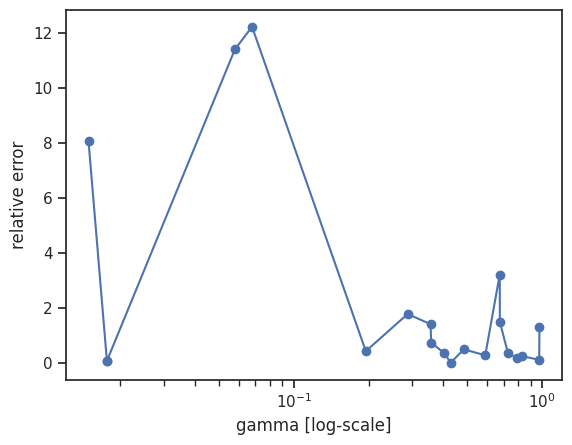

In [46]:
chi = list()

for i in range(len(test_labels)):
    curr = abs(test_labels[i] - preds[i]) / test_labels[i]
    chi.append(curr)

plt.plot(test_dataset['gamma'], chi, marker='o', label='Chi Square')
plt.xscale('log')
plt.xlabel('gamma [log-scale]')
plt.ylabel('relative error')
plt.plot()

[]

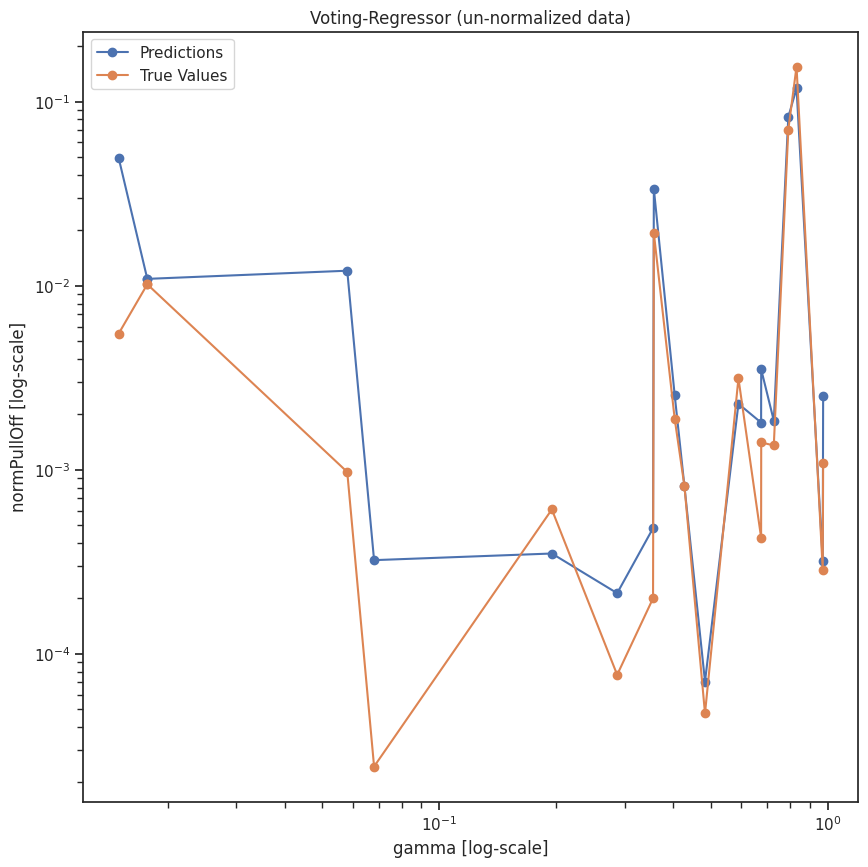

In [47]:
plt.figure(figsize=(10,10))
a = plt.axes()
plt.plot(test_features["gamma"], preds, marker='o', label='Predictions')
plt.plot(test_features["gamma"], test_labels, marker='o', label='True Values')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title("Voting-Regressor (un-normalized data)")
plt.xlabel('gamma [log-scale]')
plt.ylabel('normPullOff [log-scale]')
plt.plot()

In [12]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Size,1266.585153,529.489681
lamdabR,506.270742,540.636285
lambdaS,97.048035,203.613373
gamma,0.467093,0.293588
rho,2.595038,1.317621
normPulloff,0.018764,0.051139


In [13]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

2023-03-15 11:03:22.784005: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-15 11:03:22.784042: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-15 11:03:22.784076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (marc-ubuntu): /proc/driver/nvidia/version does not exist
2023-03-15 11:03:22.784517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[1.2665851e+03 5.0627069e+02 9.7048042e+01 4.6709290e-01 2.5950382e+00]]


In [14]:
def loss(y_true, y_pred):
  #mse = keras.losses.mean_squared_error(y_true, y_pred)
  mae = keras.losses.mean_absolute_error(y_true, y_pred)
  return mae

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64),
      layers.LayerNormalization(),
      layers.Dropout(0.5),
      layers.ReLU(),
      layers.Dense(1)
  ])

  model.compile(loss=loss,
                optimizer=tf.keras.optimizers.Adam(1e-2))
  return model

In [15]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                384       
                                                                 
 layer_normalization (LayerN  (None, 64)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [16]:
batch_size = len(train_dataset) - (int) (len(train_dataset) * 0.2)

history = dnn_model.fit(
    train_features,
    pd.DataFrame(train_labels),
    batch_size=batch_size,
    validation_split=0.2,
    epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 730ms/step - loss: 0.9682 - val_loss: 0.3626
Epoch 2/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.8606 - val_loss: 0.3393
Epoch 3/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.7136 - val_loss: 0.2740
Epoch 4/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6962 - val_loss: 0.2382
Epoch 5/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6502 - val_loss: 0.2410
Epoch 6/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.5989 - val_loss: 0.2175
Epoch 7/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.5427 - val_loss: 0.1846
Epoch 8/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.5273 - val_loss: 0.1612
Epoch 9/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.4929 - val_loss: 0.1360
Epoch 10/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.4335 - val_loss: 0.1137
Epoch 11

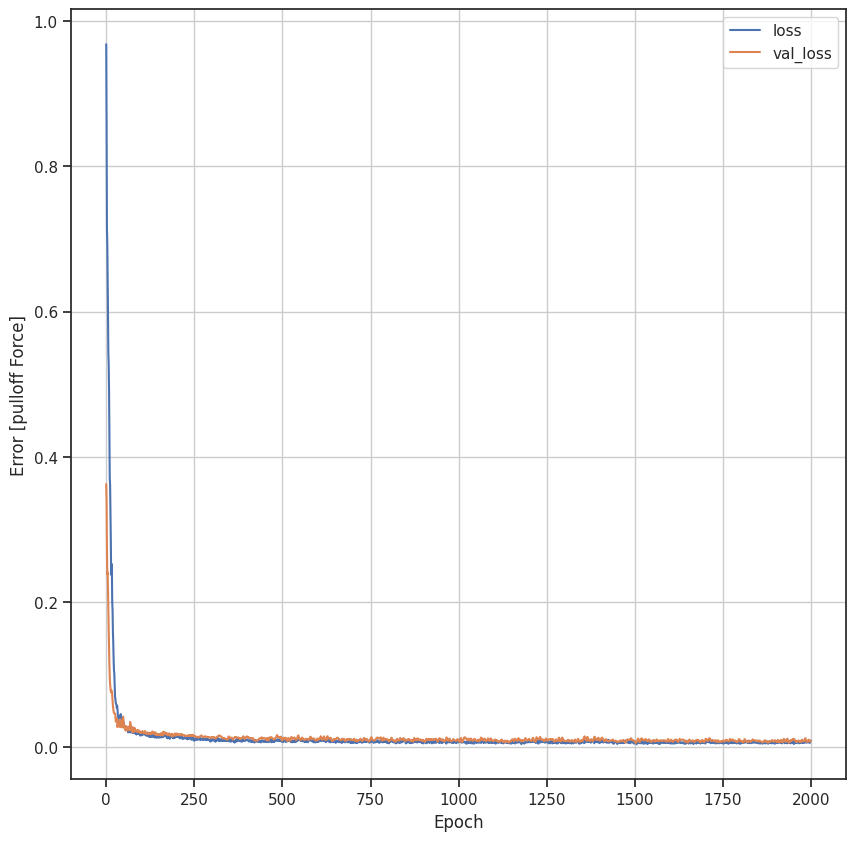

In [17]:
def plot_loss(history):
  plt.figure(figsize=(10,10))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [pulloff Force]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [23]:
preds = dnn_model.predict(true_test_dataset.drop(['normPulloff'], axis=1)).flatten()
df = pd.DataFrame(data={'#true_vals': true_test_dataset['normPulloff'], '#preds': preds})
df.to_csv(path_or_buf='../../../results/unnorm/' + 'MLP' + '.csv', sep='\t', index=False)

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step


[]

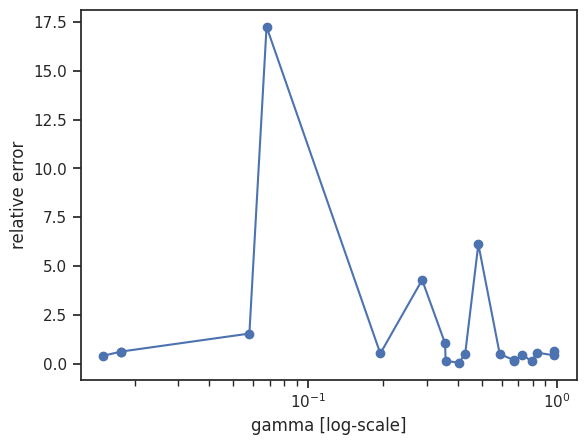

In [24]:
test_predictions = dnn_model.predict(test_features).flatten()
chi = list()

for i in range(len(test_labels)):
    curr = abs(test_labels[i] - test_predictions[i]) / test_labels[i]
    chi.append(curr)

plt.plot(test_dataset['gamma'], chi, marker='o', label='Chi Square')
plt.xscale('log')
plt.xlabel('gamma [log-scale]')
plt.ylabel('relative error')
plt.plot()

[]

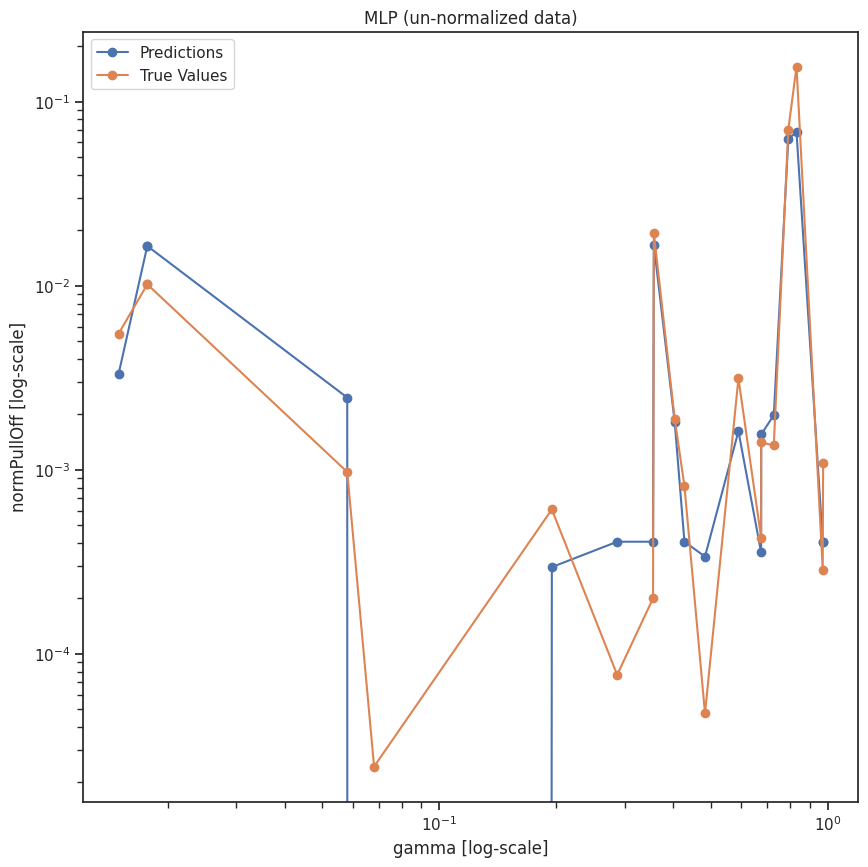

In [25]:
plt.figure(figsize=(10,10))
a = plt.axes()
plt.plot(test_features["gamma"], test_predictions, marker='o', label='Predictions')
plt.plot(test_features["gamma"], test_labels, marker='o', label='True Values')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title("MLP (un-normalized data)")
plt.xlabel('gamma [log-scale]')
plt.ylabel('normPullOff [log-scale]')
plt.plot()

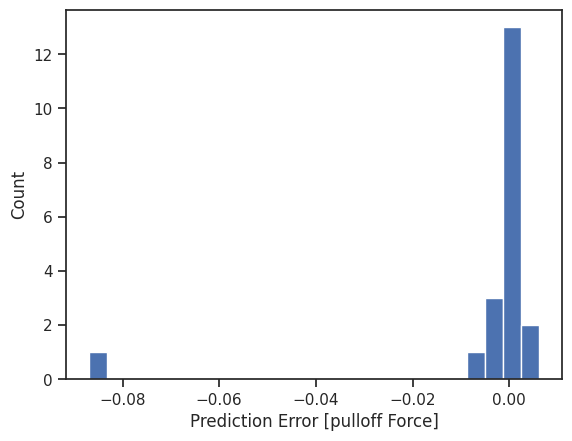

In [26]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [pulloff Force]')
_ = plt.ylabel('Count')

In [27]:
test_rsme = tf.math.sqrt(keras.losses.mean_squared_error(test_labels, test_predictions))
test_rsme.numpy()

0.01965498